# Desenvolvimento

## Análise e Visualização dos Dados
Nesta seção, vamos realizar diversas análises e criar gráficos com base no dataset `googleplaystore.csv`.


In [4]:
# Importando as bibliotecas necessárias
import pandas as pd
import matplotlib.pyplot as plt

# Lendo o arquivo CSV
df = pd.read_csv(r'C:\Users\guiha\OneDrive\Documentos\pessoal\serios\Trabalho\Compass\GitHub\Sprint_3\Desafio\googleplaystore.csv')

# Removendo linhas duplicadas
df = df.drop_duplicates()


###  Top 5 apps por número de instalações
Vamos criar um gráfico de barras que mostre os 5 principais apps com base no número de instalações.


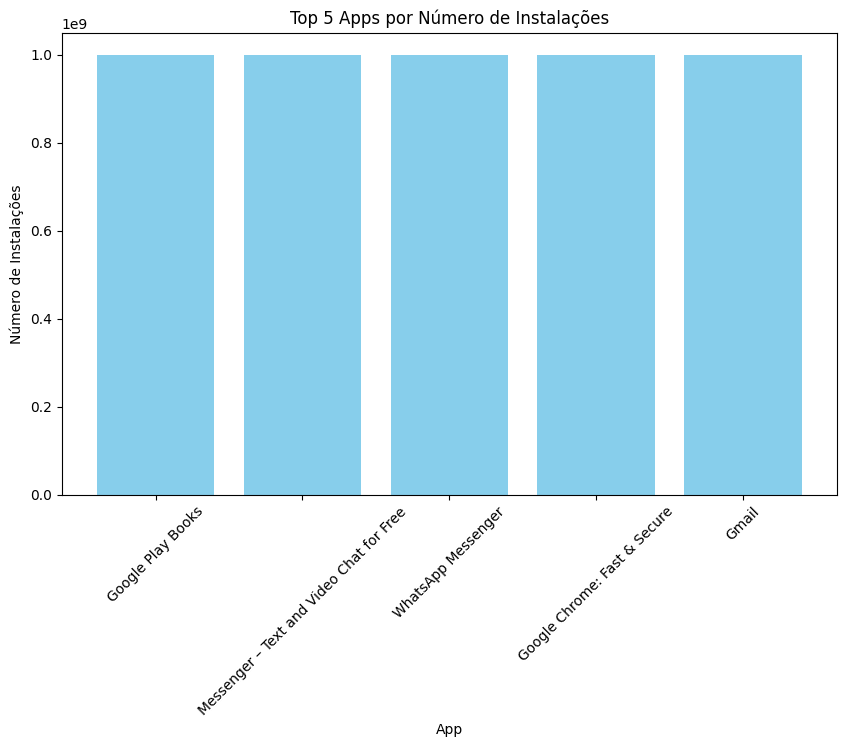

In [5]:
# Substituir caracteres não numéricos e remover entradas que não possam ser convertidas para numérico
df['Installs'] = df['Installs'].str.replace(',', '').str.replace('+', '')

# Manter apenas as linhas onde 'Installs' pode ser convertido para numérico e eliminar as demais (ex: "Free")
df = df[df['Installs'].str.isnumeric()]

# Convertendo a coluna 'Installs' para inteiro
df['Installs'] = df['Installs'].astype(int)

# Selecionando os 5 apps com maior número de instalações
top_5_installs = df.nlargest(5, 'Installs')

# Criando o gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(top_5_installs['App'], top_5_installs['Installs'], color='skyblue')
plt.title('Top 5 Apps por Número de Instalações')
plt.xlabel('App')
plt.ylabel('Número de Instalações')
plt.xticks(rotation=45)
plt.show()


### Gráfico de pizza das categorias de apps
Vamos criar um gráfico de pizza que mostre a distribuição das categorias de apps de acordo com a frequência em que elas aparecem no dataset.


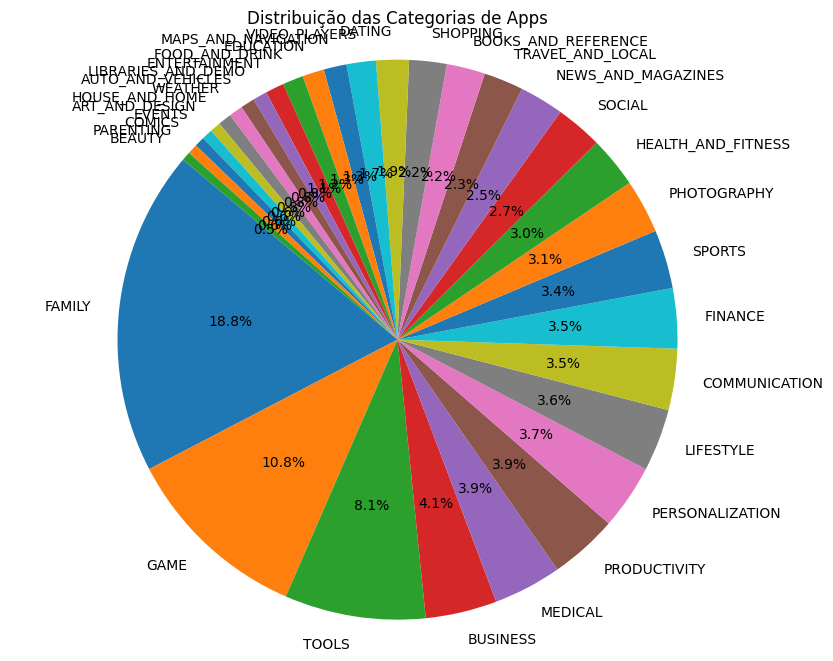

In [6]:
# Contagem do número de apps por categoria
category_counts = df['Category'].value_counts()

# Criando o gráfico de pizza
plt.figure(figsize=(10, 8))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribuição das Categorias de Apps')
plt.axis('equal')  # Garantir que o gráfico seja um círculo
plt.show()


###  App mais caro existente no dataset
Vamos identificar qual é o app mais caro presente no dataset.


In [7]:
# Convertendo a coluna "Price" para numérica (removendo o símbolo '$')
df['Price'] = df['Price'].str.replace('$', '').astype(float)

# Encontrando o app mais caro
mais_caro = df.loc[df['Price'].idxmax()]
mais_caro[['App', 'Price']]


App      I'm Rich - Trump Edition
Price                       400.0
Name: 4367, dtype: object

### Quantidade de apps classificados como "Mature 17+" (para maiores)
Vamos verificar quantos apps são classificados como "Mature 17+".


In [8]:
# Contagem de apps classificados como "Mature 17+"
mature_17_count = df[df['Content Rating'] == 'Mature 17+'].shape[0]
mature_17_count


447

### Top 10 apps por número de reviews
Vamos mostrar os 10 apps com o maior número de reviews, ordenados em ordem decrescente.


In [9]:
# Convertendo a coluna "Reviews" para numérica
df['Reviews'] = df['Reviews'].astype(int)

# Selecionando os 10 apps com maior número de reviews
top_10_reviews = df.nlargest(10, 'Reviews')

# Exibindo o resultado
top_10_reviews[['App', 'Reviews']]


,App,Reviews
2544,Facebook,78158306
3943,Facebook,78128208
336,WhatsApp Messenger,69119316
3904,WhatsApp Messenger,69109672
2604,Instagram,66577446
2545,Instagram,66577313
3909,Instagram,66509917
382,Messenger – Text and Video Chat for Free,56646578
335,Messenger – Text and Video Chat for Free,56642847
1879,Clash of Clans,44893888


### Cálculos adicionais e visualização
Vamos criar pelo menos 2 cálculos adicionais sobre o dataset e apresentá-los em um formato de lista e outro em formato de valor.


In [10]:
# Cálculo 1: Top 10 apps por número de reviews e número de instalações
top_10_reviews_installs = top_10_reviews[['App', 'Reviews', 'Installs']]
top_10_reviews_installs

# Cálculo 2: App mais caro existente no dataset
mais_caro = df['Price'].max()
mais_caro


np.float64(400.0)

### Gráfico de Linhas: Número de Reviews dos Top 10 Apps
Vamos visualizar o número de reviews dos 10 principais apps utilizando um gráfico de linhas.


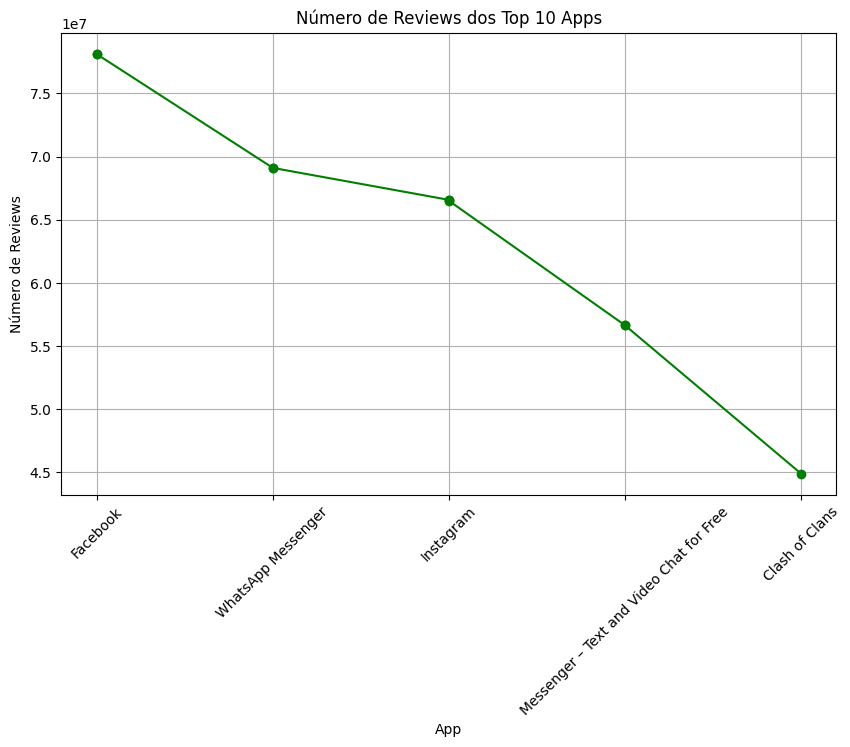

In [11]:
# Ordenando os dados para exibição no gráfico de linhas
top_10_reviews_sorted = top_10_reviews.sort_values('Reviews', ascending=False)

# Criando o gráfico de linhas
plt.figure(figsize=(10, 6))
plt.plot(top_10_reviews_sorted['App'], top_10_reviews_sorted['Reviews'], marker='o', color='green')
plt.title('Número de Reviews dos Top 10 Apps')
plt.xlabel('App')
plt.ylabel('Número de Reviews')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


### Gráfico de Dispersão: Preço vs. Número de Reviews
Vamos visualizar a relação entre o preço dos apps e o número de reviews utilizando um gráfico de dispersão.


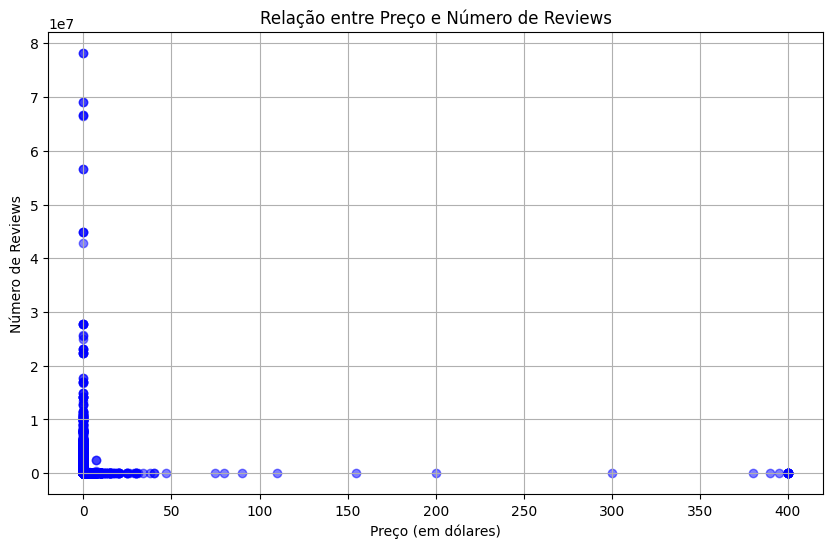

In [12]:
# Criando o gráfico de dispersão
plt.figure(figsize=(10, 6))
plt.scatter(df['Price'], df['Reviews'], alpha=0.5, color='blue')
plt.title('Relação entre Preço e Número de Reviews')
plt.xlabel('Preço (em dólares)')
plt.ylabel('Número de Reviews')
plt.grid(True)
plt.show()
